## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

###  Домашнее задание №3. Обработка текстов. Линейная классификация.

Задание выполнил(а): Подчезерцев Алексей

### Общая информация
__Дата выдачи:__ 28.04.2019

__Дедлайн:__ 23:59 12.05.2019

### Оценивание и штрафы

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи
__Стирать условия нельзя!__

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_03_Фамилия_Имя.ipynb

In [1]:
import numpy as np
import pandas as pd

В задании вам предоставлены реальные текстовые данные. 

Необходимо построить алгоритм, который будет по тексту документа определять тип источника:
 - Микроблоги
 - Новости
 - Отзывы
 - Форумы
 - Блоги
 - Видео
 - Мессенджеры

## Часть 1. Работа с текстовыми данными

 ### 1. Исследование данных

[2 балла]

Скачаем данные отсюда:
https://yadi.sk/d/o3cPgFAq5gALiw

In [459]:
D = pd.read_csv('texts_dataset.csv', sep=';', index_col=0)

C:\Users\alex1\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [460]:
D.head()

,Дата,ID сообщения,Заголовок,Текст,Дублей,Тип источника
0,27.04.2019 13:18,1396238,NaN,"-Здравствуйте, тинькофф банк\r\n-Мать твою еба...",1.0,Микроблоги
1,27.04.2019 13:15,1396239,NaN,Почему Немагия сделала обзор на Тинькова? #нем...,1.0,Микроблоги
2,27.04.2019 13:10,1396248,Forbes назвал самые экстравагантные инвестиции...,"13:01, 27.04.2019 \r\n\r\nПоделиться:\r\n\r\n ...",2.0,Новости
3,27.04.2019 13:06,1396243,Forbes назвал самые экстравагантные инвестиции...,"13:01, 27.04.2019 \r\n\r\nПоделиться:\r\n\r\n ...",2.0,Новости
4,27.04.2019 13:03,1396186,Тинькофф Страхование: Не купить полис без подп...,Первый отзыв без оценки:&nbsp;\r\nhttps://www....,1.0,Отзывы


Далее будем использовать лишь поля  "Текст", "Тип источника"

In [461]:
D = D[[ "Текст", "Тип источника"]]

In [462]:
D.head()

,Текст,Тип источника
0,"-Здравствуйте, тинькофф банк\r\n-Мать твою еба...",Микроблоги
1,Почему Немагия сделала обзор на Тинькова? #нем...,Микроблоги
2,"13:01, 27.04.2019 \r\n\r\nПоделиться:\r\n\r\n ...",Новости
3,"13:01, 27.04.2019 \r\n\r\nПоделиться:\r\n\r\n ...",Новости
4,Первый отзыв без оценки:&nbsp;\r\nhttps://www....,Отзывы


In [463]:
for i in D['Тип источника'].unique():
    print (i)

Микроблоги
Новости
Отзывы
Форумы
Блоги
Видео
Мессенджеры
nan


In [464]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200206 entries, 0 to 200205
Data columns (total 2 columns):
Текст            199578 non-null object
Тип источника    199993 non-null object
dtypes: object(2)
memory usage: 4.6+ MB


Удалим объекты с пропусками

In [465]:
D.dropna(axis = 0, inplace=True)

#### 1.1 Выведите среднюю длину текстов в каждом классе. Что можно сказать о данных? Что можно сказать о каждом классе?

In [466]:
for i in D['Тип источника'].unique():
    print(i, '\t\t', D[D['Тип источника'] == i]['Текст'].str.len().mean())

Микроблоги 		 170.67440462427746
Новости 		 2611.6309011749895
Отзывы 		 552.476661643401
Форумы 		 465.8052389493173
Блоги 		 3503.4882308276387
Видео 		 916.9406722689075
Мессенджеры 		 950.9282234491718


Наименьшая длина текстов в категории Микроблогов $\approx 170$, далее идут форумы и отзывы $\approx 500$, после Видео и Мессенджеры $ \approx 930$.

Наибольшее количество символов категории Новости $-$ 2611 и Блоги $-$ 3500.

Результаты метрик не противоречат смыслу и жизненому опыту.

#### 1.2 Приведите тексты к нижнему регистру и токенезируйте их

используйте word_tokenize из nltk.tokenize

In [467]:
from nltk.tokenize import word_tokenize

In [470]:
%%time
D['Текст'] = D['Текст'].str.lower()
D['tokens'] = D.apply(lambda x: word_tokenize(x['Текст']), axis=1)

Wall time: 5min 28s


In [471]:
D.head()

,Текст,Тип источника,tokens
0,"-здравствуйте, тинькофф банк\r\n-мать твою еба...",Микроблоги,"[-здравствуйте, ,, тинькофф, банк, -мать, твою..."
1,почему немагия сделала обзор на тинькова? #нем...,Микроблоги,"[почему, немагия, сделала, обзор, на, тинькова..."
2,"13:01, 27.04.2019 \r\n\r\nподелиться:\r\n\r\n ...",Новости,"[13:01, ,, 27.04.2019, поделиться, :, 57, forb..."
3,"13:01, 27.04.2019 \r\n\r\nподелиться:\r\n\r\n ...",Новости,"[13:01, ,, 27.04.2019, поделиться, :, 44, forb..."
4,первый отзыв без оценки:&nbsp;\r\nhttps://www....,Отзывы,"[первый, отзыв, без, оценки, :, &, nbsp, ;, ht..."


#### 1.3 Оставьте в каждом документе токены содержащие  только буквы русского или английского алфавита.


In [473]:
%%time
D['tokens'] = D.apply(lambda x : [w for w in x['tokens'] if w.isalpha()], axis=1)

Wall time: 8.54 s


In [474]:
D.head()

,Текст,Тип источника,tokens
0,"-здравствуйте, тинькофф банк\r\n-мать твою еба...",Микроблоги,"[тинькофф, банк, твою, ебал, досвидания]"
1,почему немагия сделала обзор на тинькова? #нем...,Микроблоги,"[почему, немагия, сделала, обзор, на, тинькова..."
2,"13:01, 27.04.2019 \r\n\r\nподелиться:\r\n\r\n ...",Новости,"[поделиться, forbes, назвал, самые, экстравага..."
3,"13:01, 27.04.2019 \r\n\r\nподелиться:\r\n\r\n ...",Новости,"[поделиться, forbes, назвал, самые, экстравага..."
4,первый отзыв без оценки:&nbsp;\r\nhttps://www....,Отзывы,"[первый, отзыв, без, оценки, nbsp, https, крат..."


#### 1.4 Выведите 20 слов, которые встечаются в наибольшем числе документов. Что можно сказать об этих словах?

In [475]:
import collections

In [476]:
words = collections.Counter()
for line in D["tokens"]:
    for word in set(line):
        words[word] += 1

In [477]:
for i in words.most_common(20):
    print(*i)

в 144033
и 136262
на 117638
не 110081
тинькофф 105112
с 100489
банк 93858
по 84583
что 82808
а 71779
за 68298
банка 62513
как 60769
это 59170
у 55321
для 55128
так 50070
от 49675
но 47131
к 45944


большая часть слов является предлогами и союзами и не несут смысловой нагрузки. Из 20 популярных слов смысл есть только у 3, причем 2 из них отличаются только на окончание

#### 1.5 Выведите 20 слов, которые встечаются в наименьшем числе документов 

In [478]:
for i in words.most_common()[len(words)-20:]:
    print(*i)

вардер 1
охеренный 1
фейсу 1
jagger 1
психую 1
устанлвлено 1
вылазящий 1
кэшбжком 1
повалится 1
netesov 1
отреклось 1
сварганили 1
кредитчику 1
выписного 1
наличгыми 1
pandeglol 1
пэйпассу 1
заказывый 1
советсткую 1
сверкало 1


### 2. Подготовка данных

[3 балла]

####  2.1 Разделите выборку на обучающую и тестовую в соотношении 70:30

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [480]:
D['Text'] = D.apply(lambda x: ' '.join(x['tokens']), axis=1)
D_train, D_test = train_test_split(D, test_size=0.3, random_state=42)

#### 2.2 Обучите BOW векторы на обучающей выборке и примените преобразование к обучающей и тестовой

In [481]:
%%time
cnt_vec = CountVectorizer()
D_train_bow = cnt_vec.fit_transform(D_train["Text"])
D_test_bow = cnt_vec.transform(D_test["Text"])

Wall time: 35.1 s


In [482]:
D_train_bow, D_test_bow

(<139697x278913 sparse matrix of type '<class 'numpy.int64'>'
 	with 11639034 stored elements in Compressed Sparse Row format>,
 <59871x278913 sparse matrix of type '<class 'numpy.int64'>'
 	with 4904259 stored elements in Compressed Sparse Row format>)

#### 2.3 Обучите TFIDF векторы на обучающей выборке и примените преобразование к тестовой

In [483]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()

In [484]:
%%time
X_TFIDF = tfidf_vec.fit_transform(D_train["Text"])

Wall time: 24.4 s


In [485]:
X_test_TFIDF = tfidf_vec.transform(D_test["Text"])

In [486]:
X_TFIDF

<139697x278913 sparse matrix of type '<class 'numpy.float64'>'
	with 11639034 stored elements in Compressed Sparse Row format>

In [487]:
X_test_TFIDF

<59871x278913 sparse matrix of type '<class 'numpy.float64'>'
	with 4904259 stored elements in Compressed Sparse Row format>

#### 2.4 Примените стемминг к текстам обучающей и тестовой выборки. Обучите TFIDF векторы на полученных данных.

In [488]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('russian')

In [489]:
%%time
D_train['stemmed'] = D_train.apply(lambda x: ' '.join([stemmer.stem(w) for w in x['tokens']]), axis=1)

Wall time: 21min 13s


C:\Users\alex1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [490]:
D_train.head()

,Текст,Тип источника,tokens,Text,stemmed
51329,лучшее мобильное приложение лучшего мобильного...,Отзывы,"[лучшее, мобильное, приложение, лучшего, мобил...",лучшее мобильное приложение лучшего мобильного...,лучш мобильн приложен лучш мобильн банк да и б...
88722,"20 часов назад, мурчака сказал: мы всегда п...",Форумы,"[часов, назад, мурчака, сказал, мы, всегда, пр...",часов назад мурчака сказал мы всегда примерно ...,час назад мурчак сказа мы всегд примерн счита ...
106055,цитатаmmit пишет:\r\nвойдет ли этот платеж в н...,Форумы,"[цитатаmmit, пишет, войдет, ли, этот, платеж, ...",цитатаmmit пишет войдет ли этот платеж в необх...,цитатамм пишет войдет ли этот платеж в необход...
86205,"москва, россия — 9 ноября 2018 г.\r\nтинькофф ...",Новости,"[москва, россия, ноября, тинькофф, банк, сообщ...",москва россия ноября тинькофф банк сообщает о ...,москв росс ноябр тинькофф банк сообща о введен...
194642,контактные данные. 3.3. администрация осуществ...,Блоги,"[контактные, данные, администрация, осуществля...",контактные данные администрация осуществляет с...,контактн дан администрац осуществля сбор стати...


In [491]:
%%time
D_test['stemmed'] = D_test.apply(lambda x: ' '.join([stemmer.stem(w) for w in x['tokens']]), axis=1)

Wall time: 8min 48s


C:\Users\alex1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [492]:
D_test.head()

,Текст,Тип источника,tokens,Text,stemmed
179313,ориентир доходности бессрочных субординированн...,Новости,"[ориентир, доходности, бессрочных, субординиро...",ориентир доходности бессрочных субординированн...,ориентир доходн бессрочн субординирова еврообл...
162765,у меня была кредитная карта банка тинькофф. в ...,Отзывы,"[у, меня, была, кредитная, карта, банка, тиньк...",у меня была кредитная карта банка тинькофф в и...,у мен был кредитн карт банк тинькофф в июн год...
158372,"rt @andr_11_92: если вы нуждаетесь в деньгах,и...",Микроблоги,"[rt, если, вы, нуждаетесь, в, деньгах, и, не, ...",rt если вы нуждаетесь в деньгах и не знаете гд...,rt есл вы нужда в деньг и не знает где их взят...
80873,фото: omskregion.info втб и тинькофф-...,Новости,"[фото, втб, и, изучают, вопрос, переоборудован...",фото втб и изучают вопрос переоборудования бан...,фот втб и изуча вопрос переоборудован банкомат...
56717,"тинькофф банк,\r\nотправил. там было более 3 м...",Форумы,"[тинькофф, банк, отправил, там, было, более, м...",тинькофф банк отправил там было более млн един...,тинькофф банк отправ там был бол млн единствен...


In [165]:
tfidf_vec_stem = TfidfVectorizer()

In [493]:
%%time
X_stem_TFIDF = tfidf_vec_stem.fit_transform(D_train["stemmed"])
X_test_stem_TFIDF = tfidf_vec_stem.transform(D_test["stemmed"])

Wall time: 31.1 s


#### 2.5 Сравните размеры полученных матриц

In [494]:
D_train_bow.shape, D_test_bow.shape

((139697, 278913), (59871, 278913))

In [495]:
X_TFIDF.shape, X_test_TFIDF.shape

((139697, 278913), (59871, 278913))

In [496]:
X_stem_TFIDF.shape, X_test_stem_TFIDF.shape

((139697, 123887), (59871, 123887))

После стемминга количество уникальных слов уменьшилось примерно в 2 раза.

### 3. Обучение модели и оценка результатов

[2 балла]

#### 3.1 Обучите логистическую регрессию SGDClassifier на данных, полученных в пунктах 2.2, 2.3 и 2.4.
#### Оцените качество на отложенной выборке по метрике accuracy

In [3]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [499]:
lr1 = SGDClassifier()
lr1.fit(D_train_bow, D_train["Тип источника"])
y_predict = lr1.predict(D_test_bow)
print("BOW algo accuracy:", accuracy_score(D_test["Тип источника"], y_predict))

BOW algo accuracy: 0.8353626964640644


In [501]:
lr2 = SGDClassifier()
lr2.fit(X_TFIDF, D_train["Тип источника"])
y_predict = lr2.predict(X_test_TFIDF)
print("TFIDF algo accuracy:", accuracy_score(D_test["Тип источника"], y_predict))

TFIDF algo accuracy: 0.8321892067946084


In [502]:
lr3 = SGDClassifier()
lr3.fit(X_stem_TFIDF, D_train["Тип источника"])
y_predict = lr3.predict(X_test_stem_TFIDF)
print("TFIDF with stem algo accuracy:", accuracy_score(D_test["Тип источника"], y_predict))

TFIDF with stem algo accuracy: 0.819912812546976


#### 3.2 Какой алгоритм показал наилучшее качество классификации? Как это можно объяснить?

Результат работы всех алгоритмов примерно одинаковый, результат отличается лишь на сотые доли. 

Лучший результат показал BOW алгоритм. 

BOW отличается от TFIDF на 0.007 по качеству.
Возможно, тексты подобраны на одну и ту же тематику, поэтому разделение по частоте встречамости в тексте не дает значительного изменения.

После стэминга качество упало на 0.012 по сравнению с обычным TFIDF.
Возможная причина - потеря смысла некоторых слов при откидывании окончаний и суффиксов (смысл слова в работе не восстанавливался).

#### 3.3 Выведите несколько документов из тестовой выборки, на которых были допущены ошибки. Что можно о них сказать?

In [504]:
_D_test = D_test.reindex()
_D_test.index=np.arange(_D_test.shape[0])
for i,r in _D_test[_D_test["Тип источника"] != y_predict][:10].iterrows():
    print("Text:")
    print(r["Текст"])
    print("Stammed text:")
    print(r["stemmed"])
    print("Predicted: ", r["Тип источника"])
    print("Actual: ", y_predict[i])
    print("="*60)

Text:
тинькофф банк,
отправил. там было более 3 млн. единственное, чем можно объяснить - списанием средств при покупке акций и не моментальным зачислением самих акций на счёт. у меня ситуация может быть аналогичной.
при этом в чате сообщали. что проблемой это не будет.
Stammed text:
тинькофф банк отправ там был бол млн единствен чем можн объясн списан средств при покупк акц и не моментальн зачислен сам акц на счет у мен ситуац может быт аналогичн при эт в чат сообща что проблем эт не будет
Predicted:  Форумы
Actual:  Отзывы
Text:
спасибо тинькофф банку https://www.tinkoffinsurance.ru/ins/osago-product/
за быстрое и простое оформление е-осаго, все понятно и интуитивно, также цена ниже чем у конкурентов! оплатили картой и в момент полис на почте), правда теперь вся семья заставила делать им полисы). ну и по оформлению другого полиса осаго надеюсь решится успешно, в прошлый раз видимо не все данные передали в базу, и теперь коэффициент 1, но полис на руках есть.
Stammed text:
спасиб тиньк

По некоторым текстам и человеку трудно сказать, к какой именно категории относится текст из-за неоднозначности информации и пересечений категорий.

Кроме того, часть информации была потеряна при обработке данных, например в последней записи (теги форумов).

Возможно, стоило добавить анализ тегов и разметки, но это бы было в какой-то мере читерством)

#### 3.4 Постройте матрицу ошибок. Проанализируйте ее.

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

Всмомогательная статистика по текстам:

In [506]:
_D_test[_D_test["Тип источника"] ==y_predict].groupby("Тип источника")["Text"].describe()

,count,unique,top,freq
Тип источника,,,,
Блоги,113,101,информационный портал новости банков является ...,11
Видео,2142,1640,https регистрация в letyshops https расширение...,170
Мессенджеры,81,39,друзья совместно с тинькофф банк мы запустили ...,24
Микроблоги,5304,2971,rt если вы нуждаетесь в деньгах и не знаете гд...,227
Новости,10556,7818,в связи с новым годом набираем новую команду и...,759
Отзывы,12762,12268,текст отсутствует,57
Форумы,18131,17765,оно не тонет,40


In [507]:
_D_test[_D_test["Тип источника"] !=y_predict].groupby("Тип источника")["Text"].describe()

,count,unique,top,freq
Тип источника,,,,
Блоги,1440,1405,рубрика бытовуха а вот скажите мне кто в курсе...,6
Видео,1419,1392,в таком quot дупле quot как у юльке что ей quo...,5
Мессенджеры,852,779,лучших банков для ип в году к менее значимым н...,5
Микроблоги,1160,1154,вы можете помочь в развитии нашему фонду перев...,3
Новости,824,811,говорю же что поступления были с эквайринга ти...,3
Отзывы,2486,2441,,11
Форумы,2601,2537,в любом бизнесе который вы бы не начали вам ну...,6


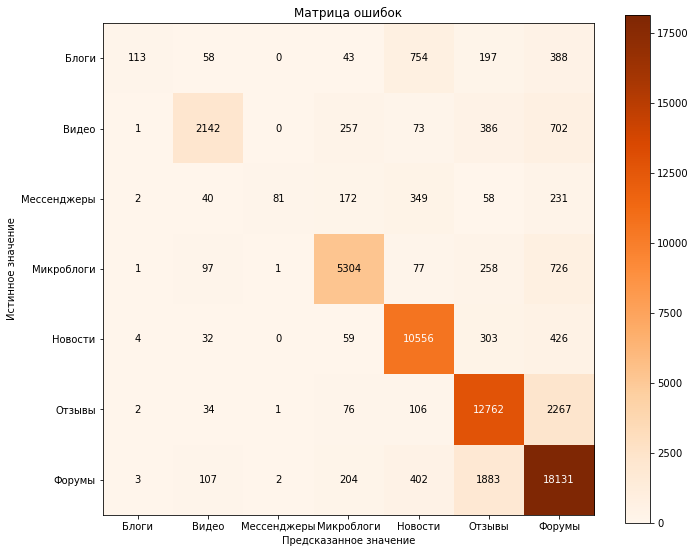

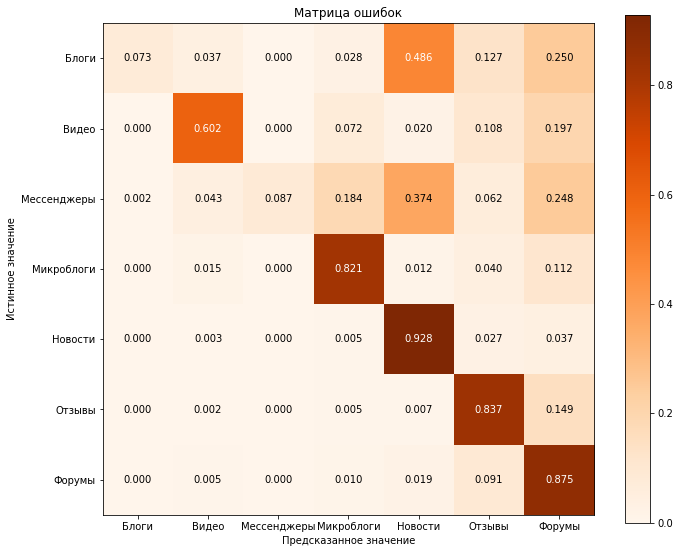

In [508]:
cm = confusion_matrix(D_test["Тип источника"], y_predict)
classes = unique_labels(D_test["Тип источника"], y_predict)

fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),yticks=np.arange(cm.shape[0]), xticklabels=classes, yticklabels=classes,
       title='Матрица ошибок',
       ylabel='Истинное значение',
       xlabel='Предсказанное значение')
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
classes = unique_labels(D_test["Тип источника"], y_predict)

fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels=classes, yticklabels=classes,
       title='Матрица ошибок',
       ylabel='Истинное значение',
       xlabel='Предсказанное значение')
fmt = '.3f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

Из 2 диаграммы видно, что модель хорошо предсказывает категории микроблоги, новости, отзывы и форумы.
Хорошим остается предсказание для видео.

Модель совершенно не угадывает блоги и мессенджеры и относит их чаще к новостям.

Кроме того, модель часто неверно определяет другие категории не только как новости, но и форумы.


## Часть 2. Логистическая регрессия.
[3 балла]

Для наших экспериентов возьмём обучающую выборку [отсюда](https://www.kaggle.com/iabhishekofficial/mobile-price-classification).

In [4]:
train = pd.read_csv('train.csv')

Решается задача многоклассовой классификации — определение ценовой категории телефона. Для простоты перейдём к задаче бинарной классификации — пусть исходные классы 0 и 1 соответствуют классу 0 новой целевой переменной, а остальные классу 1.
​
Замените целевую переменную, отделите её в отдельную переменную и удалите из исходной выборки.

In [5]:
y = train["price_range"].apply(lambda x: 0 if x == 0 or x == 1 else 1)
X = train.drop("price_range", axis=1)
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


Разделите выборку на обучающую и тестовую части в соотношении 7 к 3. Для этого можно использовать `train_test_split` из scikit-learn. Не забудьте зафиксировать сид для разбиения.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

В этой части вы будете обучать самый простой бинарный классификатор — логистическую регрессию. Будем использовать готовую реализацию `LogisticRegression` из scikit-learn.

Логистическая регрессия — линейный метод, то есть в нём предсказание алгоритма вычислаяется как скалярное произведение признаков и весов алгоритма: 

$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Для вычисления вероятности положительного класса применяется сигмода. В результате предсказание вероятности принадлежности объекта к положительному классу можно записать как: 

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- w_0 - \langle w, x \rangle )}
$$

Не забывайте, что для линейных методов матрицу объекты-признаки необходимо предварительно нормировать (то есть привести каждый признак к одному и тому же масштабу одним из способов). Для этого можно воспользоваться `StandardScaler` или сделать это вручную.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\alex1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\alex1\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\alex1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


Обучите логистическую регрессию. Сделайте предсказания для тестовой части, посчитайте по ним ROC-AUC и Accuracy (порог 0.5). Хорошо ли удаётся предсказывать целевую переменную?
Не забывайте, что метод predict_proba вычисляет вероятности обоих классов выборки, а в бинарной классификации нас интересует в первую очередь вероятность принадлежности к положительному классу.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [10]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict_proba(X_test)[:,1]

C:\Users\alex1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
print("ROC-AUC: ", roc_auc_score(y_test, y_predict))
print("Accuracy: ", accuracy_score(y_test, np.round(y_predict)))

ROC-AUC:  0.9997555311086664
Accuracy:  0.9866666666666667


У обученной логистической регрессии есть два аттрибута: `coef_` и `intercept_`, которые соответствуют весам $w$ и $w_0$. Это и есть результат обучения логистической регрессии. Попробуйте с помощью них (с помощью всё той же обученной ранее логистической регрессии) посчитать "сырое" предсказание алгоритма $b(x)$. 

Постройте гистограмму полученных значений и ответьте на вопросы:
- Какие значения принимает такое предсказание?
- Похожи ли эти значения на вероятность классов?

In [12]:
b_x = lr.intercept_[0] + lr.coef_[0].dot(X_test.T)

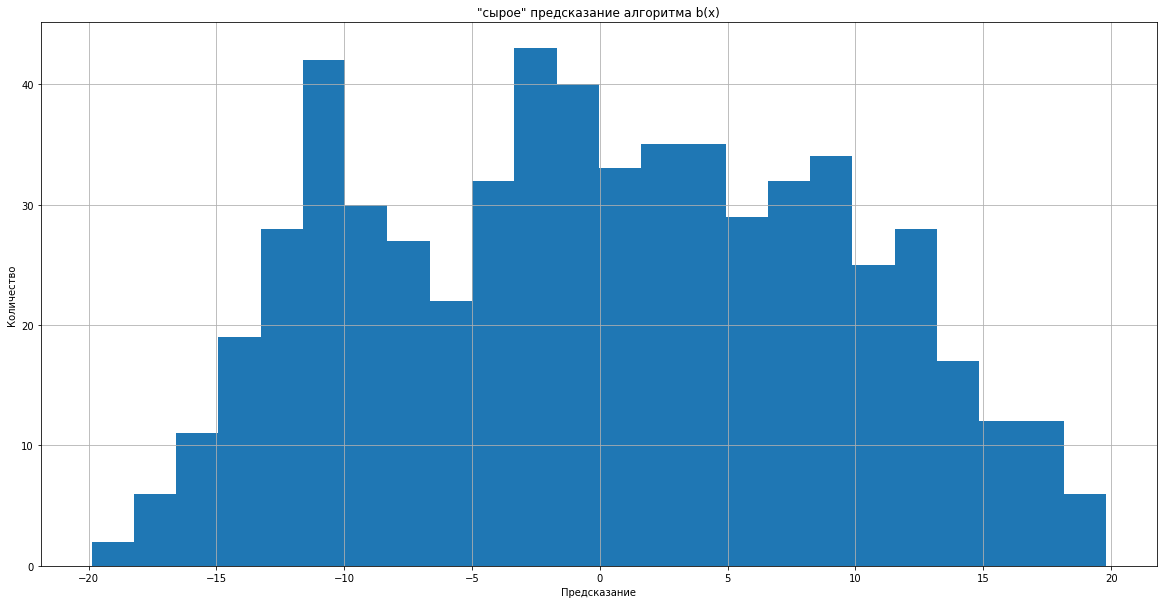

In [540]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.title('"сырое" предсказание алгоритма b(x)')
plt.xlabel('Предсказание')
plt.ylabel('Количество')
plt.hist(b_x, bins=np.int(np.sqrt(b_x.shape[0])))
plt.show()

Данные распределены примерно одинаково относительно 0 (303 и 297 записей).

Заметны некоторые отколонения колчества записей в некоторых диапазонах (например -11..-10), но в целом количество записей у краев распределения уменьшается.

Значения похожи на вероятность принадлежности к классу.
Диапазон значений больше единицы на количество признаков - 20.

Реализуйте сигмоиду и постройте её график. Что вы можете сказать об этой функции?

In [18]:
def sigma(x):
    return 1/(1 + np.exp(-x))

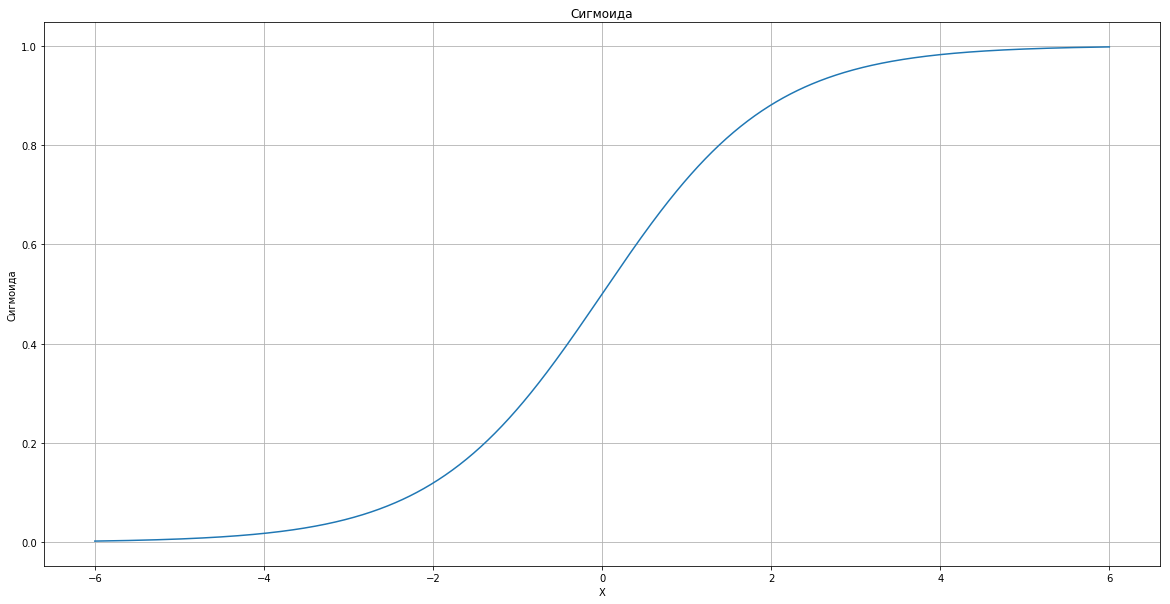

In [19]:
plt.figure(figsize=(20,10))
_x = np.linspace(-6, 6, 1000)
_y = sigma(_x)
plt.grid(True)
plt.title('Сигмоида')
plt.xlabel('X')
plt.ylabel('Сигмоида')
plt.plot(_x, _y)
plt.show()

Примените реализованную сигмоиду к $b(x)$. Вы должны получить вероятности принадлежности к положительному классу. Проверьте, что ваши значения совпали с теми, которые получены с помощью `predict_proba`.

In [20]:
b_xx = sigma(b_x)

In [21]:
sum(b_xx != y_predict)

0

Значения совпали

Таким образом, обучение логистической регрессии — настройка параметров $w$ и $w_0$, а применение — подсчёт вероятностей принадлежности положительному классу как применение сигмоды к скалярному произведению признаков и параметров.

Постройте для обученной логистической регрессии ROC-кривую `roc_curve` и PR-кривую `precision_recall_curve`.

In [22]:
from sklearn.metrics import precision_recall_curve,  roc_curve

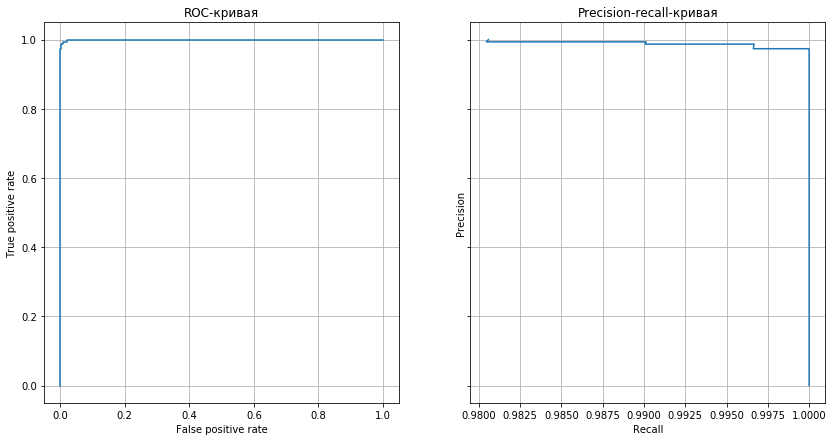

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,7))
ax1.grid(True)
ax1.set(title='ROC-кривая', xlabel ='False positive rate',ylabel ='True positive rate')
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
ax1.plot(fpr, tpr)
fpr, tpr, thresholds = precision_recall_curve(y_test, y_predict)
ax2.grid(True)
ax2.set(title='Precision-recall-кривая', xlabel ='Recall',ylabel ='Precision')
ax2.plot(fpr, tpr)

### 4. Бонусное задание. Обучение логистической регрессии.

[2 бонусных балла]

В этой части вы будете обучать самый простой бинарный классификатор — логистическую регрессию. Будем использовать готовую реализацию `LogisticRegression` из scikit-learn.

Логистическая регрессия — линейный метод, то есть в нём предсказание алгоритма вычислаяется как скалярное произведение признаков и весов алгоритма: 

$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Для вычисления вероятности положительного класса применяется сигмода. В результате предсказание вероятности принадлежности объекта к положительному классу можно записать как: 

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- w_0 - \langle w, x \rangle )}
$$



Если выше вручную мы только применяли логистическую регрессию, то здесь предлагается реализовать обучение с помощью полного градиентного спуска.
Если кратко, то обучение логистической регрессии с $L_2$-регуляризацией можно записать следующим образом:

$$
Q(w, X) = \frac{1}{l} \sum_{i=1}^{l} \log (1 + \exp(- y_i \langle w, x_i \rangle )) + \frac{\lambda_2}{2} \lVert w \rVert _2^2 \to \min_w
$$

Считаем, что $y_i \in \{-1, +1\}$, а нулевым признаком сделан единичный (то есть $w_0$ соответствует свободному члену). Искать $w$ будем с помощью градиентного спуска:

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla_w Q(w, X)
$$

В случае полного градиентного спуска $\nabla_w Q(w, X)$ считается напрямую (как есть, то есть, используя все объекты выборки). Длину шага $\alpha > 0$ в рамках данного задания предлагается брать равной некоторой малой константе.
Градиент по объекту $x_i$ считается по следующей формуле:

$$
\nabla_w Q(w, x_i) = - \frac{y_i x_i}{1 + \exp(y_i \langle w, x_i \rangle)} + \lambda_2 w
$$

На самом деле неправильно регуляризировать свободный член $w_0$ (то есть при добавлении градиента для $w_0$ не надо учитывать слагаемое с $\lambda_2$). Но в рамках этого задания мы не обращаем на это внимания и работаем со всеми вектором весов одинаково.

В качестве критерия останова необходимо использовать (одновременно):

- проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) — параметр tolerance
- достижение максимального числа итераций (например, 10000) — параметр max_iter.

Инициализировать веса можно случайным образом или нулевым вектором.

Реализуйте обучение логистической регрессии. Для удобства ниже предоставлен прототип с необходимыми методами. В loss_history необходимо сохранять вычисленное на каждой итерации значение функции потерь.

In [136]:
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, lambda_2=1.0, tolerance=1e-4, max_iter=100, alpha=0.005):
        """
        lambda_2: L2 regularization param
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        alpha: learning rate
        """
        self.lambda_2 = lambda_2
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.alpha = alpha
        self.w = None
        self.loss_history = None
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        if type(X) is pd.core.series.Series:
            X = X.values
        
        if type(y) is pd.core.series.Series:
            y = y.values
        self.loss_history = []
        
        shape = X.shape
        self.w = np.zeros(shape[1])
        for step in range(self.max_iter):
            self.w_curr = self.w - self.alpha * self.calc_gradient(X, y)
            self.loss_history.append(self.calc_loss(X,y))
            if np.linalg.norm(self.w_curr - self.w) < self.tolerance:
                break
            self.w = self.w_curr
            
        return self
    
    def predict_proba(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array of shape (l, 2) where
        first column has probabilities of -1
        second column has probabilities of +1
        """
        if self.w is None:
            raise Exception('Not trained yet')
        proba = sigma(np.dot(X_test, self.w))
        return np.array([proba, 1 - proba]).T
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        g = 0
        for i in range(X.shape[0]):
            g += y[i] * X[i] * sigma(y[i] * self.w.dot(X[i]))
        g /= X.shape[0] 
        g += self.lambda_2 * self.w
        return g

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """         
        return sum([sigma(y[i] * self.w.dot(X[i]))  for i in range(X.shape[0]) ]) / X.shape[0] +  self.lambda_2 / 2 * (np.linalg.norm(self.w) ** 2)

In [137]:
lr = LogReg()
lr.fit(X_train, y_train)

LogReg(alpha=0.005, lambda_2=1.0, max_iter=100, tolerance=0.0001)

In [138]:
y_predict = lr.predict_proba(X_test)[:,1]

In [139]:
print("ROC-AUC: ", roc_auc_score(y_test, y_predict))
print("Accuracy: ", accuracy_score(y_test, np.round(y_predict)))

ROC-AUC:  0.9956106721783289
Accuracy:  0.96


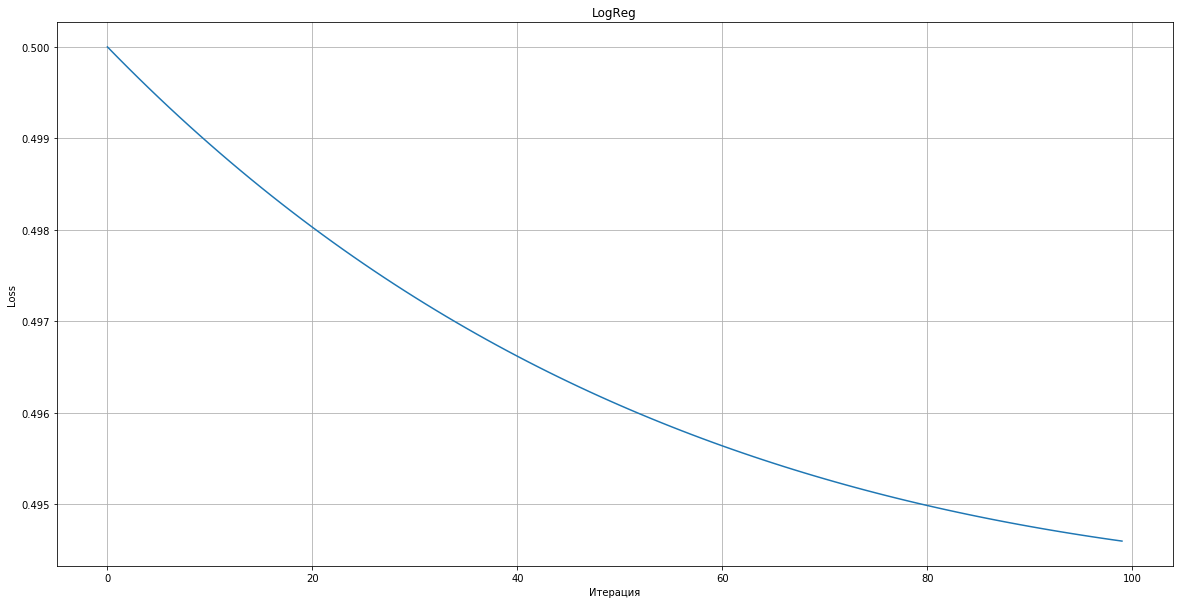

In [140]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.title('LogReg')
plt.xlabel('Итерация')
plt.ylabel('Loss')
plt.plot(range(len(lr.loss_history)), lr.loss_history)
plt.show()

- Примените логистическую регресиию на той же выборке.
- Посчитайте качество по тем же метрикам.
- Визуализируйте изменение значений функции потерь от номера итераций.
